In [76]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import ( confusion_matrix, ConfusionMatrixDisplay, 
                    classification_report, accuracy_score, precision_score,
                    recall_score, f1_score )

In [77]:
# Step 2: Import the dataset
df = pd.read_csv("Social_Network_Ads.csv")
df.head(10)

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
5,15728773,Male,27,58000,0
6,15598044,Female,27,84000,0
7,15694829,Female,32,150000,1
8,15600575,Male,25,33000,0
9,15727311,Female,35,65000,0


In [78]:
# Display basic info
df.info()
print("\n----------------- Dataset Summary -----------------")
print(df.describe())

print("\n Missing Values:", df.isnull().sum())

print("\n Dataset Shape:", df.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB

----------------- Dataset Summary -----------------
            User ID         Age  EstimatedSalary   Purchased
count  4.000000e+02  400.000000       400.000000  400.000000
mean   1.569154e+07   37.655000     69742.500000    0.357500
std    7.165832e+04   10.482877     34096.960282    0.479864
min    1.556669e+07   18.000000     15000.000000    0.000000
25%    1.562676e+07   29.750000     43000.000000    0.000000
50%    1.569434e+07   37.000000     70000.000000    0.000000
75%    1.575036e+07   46.000000     88000.000000  

In [79]:
# Select features and target variable
X = df.iloc[:, 2:4]  # Selecting Age and EstimatedSalary
y = df.iloc[:, 4]    # Target variable (Purchased)

# Split data into training and testing (75% training, 25% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Scale features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train Logistic Regression model
lr = LogisticRegression(random_state=0, solver='lbfgs')
lr.fit(X_train, y_train)

# Make predictions
pred = lr.predict(X_test)

In [80]:
# Print first 10 predictions
print("First 10 Test Samples:\n", X_test[:10])
print("\n Predicted Values:", pred[:10])
print("\n Actual Values:", y_test[:10].values)

First 10 Test Samples:
 [[ 0.812419   -1.39920777]
 [ 2.0889839   0.52871943]
 [-0.95513241 -0.75656537]
 [ 1.0088136   0.76240757]
 [-0.85693511 -1.22394166]
 [-0.75873781 -0.23076704]
 [ 0.9106163   1.08372877]
 [-0.85693511  0.38266434]
 [ 0.2232352   0.14897619]
 [ 0.4196298  -0.14313399]]

 Predicted Values: [0 1 0 1 0 0 1 0 0 0]

 Actual Values: [0 1 0 1 0 0 1 0 0 0]


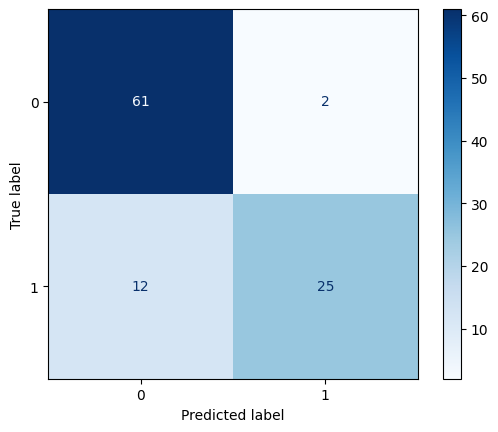

In [81]:
# Confusion Matrix
tp, fn, fp, tn = confusion_matrix(y_test, pred, labels=[1, 0]).ravel()
conf_matrix = confusion_matrix(y_test, pred, labels=lr.classes_)
ConfusionMatrixDisplay(conf_matrix, display_labels=lr.classes_).plot(cmap=plt.cm.Blues)
plt.show()

In [82]:
# Model Evaluation
print(classification_report(y_test, pred))


              precision    recall  f1-score   support

           0       0.84      0.97      0.90        63
           1       0.93      0.68      0.78        37

    accuracy                           0.86       100
   macro avg       0.88      0.82      0.84       100
weighted avg       0.87      0.86      0.85       100



In [83]:
# Model Evaluation
print('Accuracy: {:.2f}'.format(accuracy_score(y_test, pred)))
total = tp + tn + fn + fp
print('\n Error Rate:', (fp + fn) / total if total != 0 else "Undefined (No Predictions)")
print('\n Recall (Sensitivity):', tp / (tp + fn) if (tp + fn) != 0 else "Undefined")
print('\n Specificity:', tn / (tn + fp) if (tn + fp) != 0 else "Undefined")
print('\n Precision:', tp / (tp + fp) if (tp + fp) != 0 else "Undefined")
print('\n False Positive Rate:', fp / (tn + fp) if (tn + fp) != 0 else "Undefined")


Accuracy: 0.86

 Error Rate: 0.14

 Recall (Sensitivity): 0.6756756756756757

 Specificity: 0.9682539682539683

 Precision: 0.9259259259259259

 False Positive Rate: 0.031746031746031744


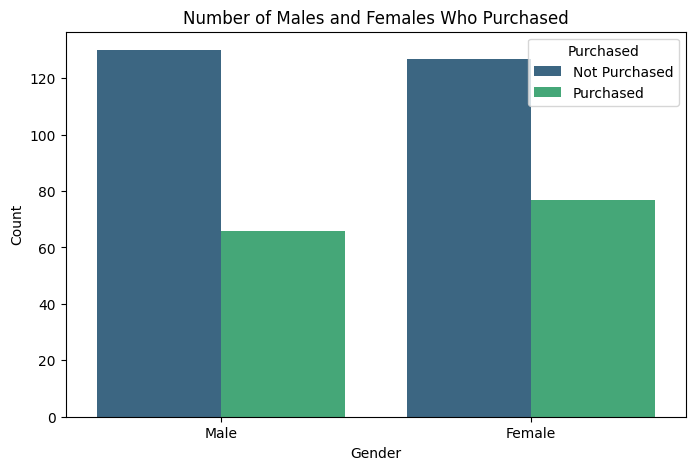

In [84]:
# Countplot for Males and Females Who Purchased
df['Purchased'] = df['Purchased'].astype(str)  # Convert target to string for better visualization

plt.figure(figsize=(8, 5))
sns.countplot(x='Gender', hue='Purchased', data=df, palette='viridis')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Number of Males and Females Who Purchased')
plt.legend(title='Purchased', labels=['Not Purchased', 'Purchased'])
plt.show()